<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Plots_de_Omega_m_Linder_e_Cahn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos come√ßar plotando as equa√ß√µes (1) do artigo de Linder e Cahn com $g(a) = \delta/a$ para tr√™s valores diferentes de $\Omega_m$.

In [ ]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

‚ú®üç∞‚ú® Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà/  /‚ñà‚ñà/  /‚ñà‚ñà/  /‚ñà‚ñà/  /‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ‚ñà‚ñà‚ñà‚ïó   ‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ïó   ‚ñà‚ñà‚ñà‚ïó‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïó  ‚ñà‚ñà‚ñà‚ñà‚ñà‚ïó
        ‚ñà‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïó‚ñà‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïó‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïó
        ‚ñà‚ñà‚ïî‚ñà‚ñà‚ñà‚ñà‚ïî‚ñà‚ñà‚ïë‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ñà‚ñà‚ñà‚ñà‚ïî‚ñà‚ñà‚ïë‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïî‚ïù‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïë
        ‚ñà‚ñà‚ïë‚ïö‚ñà‚ñà‚ïî‚ïù‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïë‚ñà‚ñà‚ïë‚ïö‚ñà‚ñà‚ïî‚ïù‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚

In [ ]:
import pyccl as ccl

Primeiramente, vamos plotar para $\Omega_m$ = 0.25. Abaixo, plotaremos a solu√ß√£o de $\delta$.

In [ ]:
cosmo1 = ccl.Cosmology(
    Omega_c=0.20, Omega_b=0.05, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.33, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo1, a)  # contraste

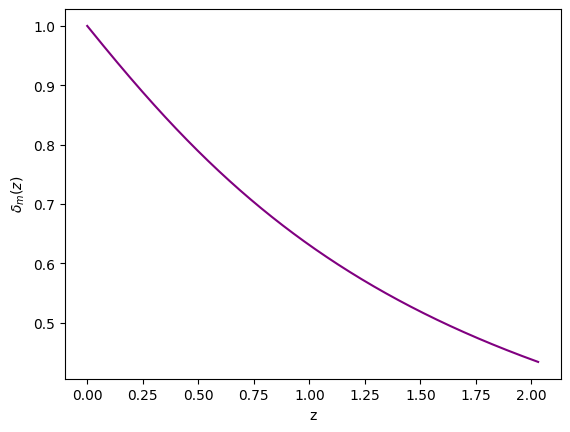

In [ ]:
# definindo o redshift em fun√ß√£o do fator de escala
z = (1/a) - 1.

# plotando o gr√°fico de delta x z
plt.xlabel('z')
plt.ylabel('$\delta_m(z)$')
plt.plot(z, delta, color='purple')
plt.show()

Vamos resolver a equa√ß√£o (1) do artigo do Linder e Cahn, considerando que:

$\Omega_m (a) = \frac{\Omega_{m0} a^{-3}}{\Omega_{m0} a^{-3} + \Omega_{\Lambda 0}}$,

em que:

$\Omega_{\Lambda 0} = 1 - \Omega_{m0}$.

Logo:

$\Omega_m (a) = \frac{\Omega_{m0} a^{-3}}{\Omega_{m0} a^{-3} + 1 - \Omega_{m0}}$.

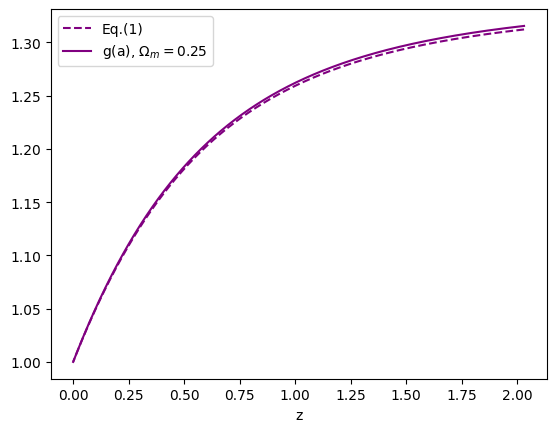

In [ ]:
# constantes
H0 = 70 #km/s/Mpc
Om01 = 0.25

g = delta/a 


# definindo H^2
#H = H0*((Om01*(a**(-3)))/Om1)**(1/2)

# definindo O_m
Om1 = (Om01*(a**(-3)))/(Om01*(a**(-3)) + 1 - Om01 )


from scipy.integrate import cumtrapz


# vamos definir a equa√ß√£o (1) do artigo
gamma = 6./11.

I1 = cumtrapz(((Om1 ** gamma) - 1)/a, x=a, initial=0.000001)

G_a1 = np.exp(I1)

G_a1 = G_a1/G_a1[-1]

# vamos plotar a equa√ß√£o
plt.plot(z, G_a1, color='purple', linestyle="--", label='Eq.(1)')
plt.plot(z, g, color='purple', label='g(a), $\Omega_m = 0.25$')
plt.xlabel('z')
plt.legend()
plt.show()

Agora, vamos plotar para $\Omega_m$ = 0.30. Faremos o mesmo passo a passo feito anteriormente.

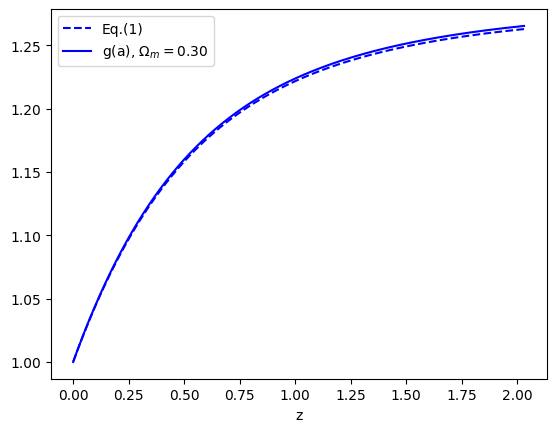

In [ ]:
cosmo2 = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a2 = np.linspace(0.33, 1, 1000)  # fator de escala
delta2 = ccl.growth_factor(cosmo2, a2)  # contraste

# definindo o redshift em fun√ß√£o do fator de escala
z2 = (1/a2) - 1.

g2 = delta2/a2

# constantes
H0 = 70 #km/s/Mpc
Om02 = 0.30

# definindo H^2
#H2 = H0*((Om02*(a2**(-3)))/Om2)**(1/2)

# definindo O_m
Om2 = (Om02*(a2**(-3)))/(Om02*(a2**(-3)) + 1 - Om02 )



from scipy.integrate import cumtrapz


# vamos definir a equa√ß√£o (1) do artigo
gamma2 = 6./11.

I2 = cumtrapz(((Om2 ** gamma2) - 1)/a2, x=a2, initial=0.000001)

G_a2 = np.exp(I2)

G_a2 = G_a2/G_a2[-1]

# vamos plotar a equa√ß√£o
plt.plot(z, G_a2, color='blue', linestyle="--", label='Eq.(1)')
plt.plot(z, g2, color='blue', label='g(a), $\Omega_m = 0.30$')
plt.xlabel('z')
plt.legend()
plt.show()

Agora, vamos plotar para $\Omega_m$ = 0.35. Faremos o mesmo passo a passo feito anteriormente.

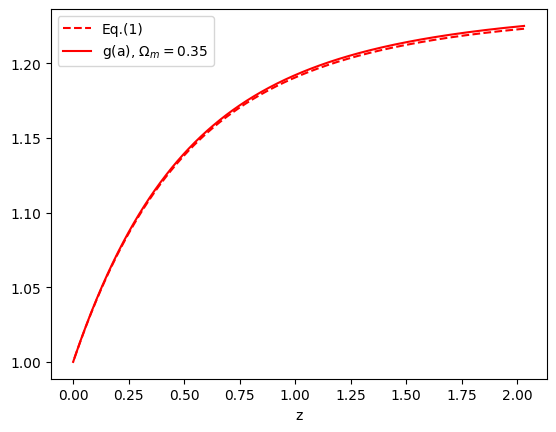

In [ ]:
cosmo3 = ccl.Cosmology(
    Omega_c=0.30, Omega_b=0.05, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a3 = np.linspace(0.33, 1, 1000)  # fator de escala
delta3 = ccl.growth_factor(cosmo3, a3)  # contraste

# definindo o redshift em fun√ß√£o do fator de escala
z3 = (1/a3) - 1.

g3 = delta3/a3

# constantes
H0 = 70 #km/s/Mpc
Om03 = 0.35

# definindo H^2
#H3 = H0*((Om03*(a3**(-3)))/Om3)**(1/2)

# definindo O_m
Om3 = (Om03*(a3**(-3)))/(Om03*(a3**(-3)) + 1 - Om03 )



from scipy.integrate import cumtrapz


# vamos definir a equa√ß√£o (1) do artigo
gamma3 = 6./11.

I3 = cumtrapz(((Om3 ** gamma3) - 1)/a3, x=a3, initial=0.000001)

G_a3 = np.exp(I3)

G_a3 = G_a3/G_a3[-1]

# vamos plotar a equa√ß√£o
plt.plot(z, G_a3, color='red', linestyle="--", label='Eq.(1)')
plt.plot(z, g3, color='red', label='g(a), $\Omega_m = 0.35$')
plt.xlabel('z')
plt.legend()
plt.show()